## Private and Public Funding of NYC Parks

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/juliekerisel/Downloads/parks_funding.csv")

In [3]:
#Parks with 10 highest maintenance funding
df.sort_values(by= 'maintenance_funding', ascending=False).head(10)

,boro,Name_Proper,maintenance_funding,private_funding,ACREAGE
572,Queens,Flushing Meadows Corona Park,2111504,595902,897.69
1469,Brooklyn,Prospect Park,1173653,1942874,540.51
579,Queens,Forest Park,1112711,0,506.86
578,Brooklyn,Forest Park,1112711,0,506.86
599,Staten Island,Franklin D. Roosevelt Boardwalk And Beach,824079,0,644.35
1530,Manhattan,Riverside Park,724119,1370333,260.44
1395,Bronx,Pelham Bay Park,722513,0,2771.75
358,Brooklyn,Coney Island Beach & Boardwalk,690924,0,399.47
254,Brooklyn,Canarsie Park,623409,0,132.20
1853,Bronx,Van Cortlandt Park,549162,116477,1146.43


In [4]:
#Parks with 10 highest private funding
df.sort_values(by= 'private_funding', ascending=False).head(11)

,boro,Name_Proper,maintenance_funding,private_funding,ACREAGE
282,Manhattan,Central Park,446300,24717743,840.64
235,Manhattan,Bryant Park,2408,8584181,9.60
1469,Brooklyn,Prospect Park,1173653,1942874,540.51
218,Brooklyn,Brooklyn Bridge Park,13008,1482623,21.38
219,Manhattan,Brooklyn Bridge Park,13008,1482623,21.38
1044,Manhattan,Madison Square Park,14042,1421056,6.23
1530,Manhattan,Riverside Park,724119,1370333,260.44
1764,Manhattan,The Battery,45736,1358909,21.88
541,Manhattan,Father Duffy Square,1092,1112098,0.08
572,Queens,Flushing Meadows Corona Park,2111504,595902,897.69


In [6]:
#Median maintenance funding per borough
median_public_funding= df.groupby(['boro']).median()['maintenance_funding']

In [7]:
median_public_funding

boro
Bronx            5691.0
Brooklyn         6393.0
Manhattan        5932.5
Queens           5294.0
Staten Island    5117.5
Name: maintenance_funding, dtype: float64

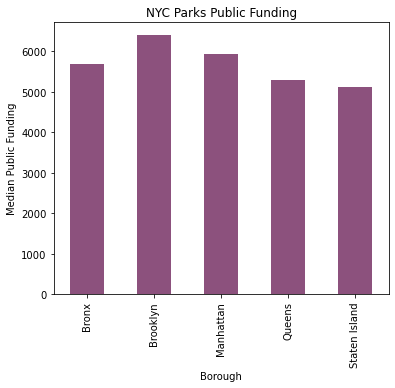

In [9]:
#Bar chart of median maintenance funding by borough
median_public_funding.plot(kind='bar', title='NYC Parks Public Funding', ylabel='Median Public Funding',
         xlabel='Borough', figsize=(6, 5), color=['#8C517D'])
plt.show()

In [10]:
#Median private funding per borough
df.groupby(['boro']).median()['private_funding']

boro
Bronx            0.0
Brooklyn         0.0
Manhattan        0.0
Queens           0.0
Staten Island    0.0
Name: private_funding, dtype: float64

In [11]:
#Total public funding by borough
public_sum= df.pivot_table(index=['boro'],aggfunc={'maintenance_funding':np.sum})

In [12]:
#Total private funding by borough
private_sum= df.pivot_table(index=['boro'],aggfunc={'private_funding':np.sum})

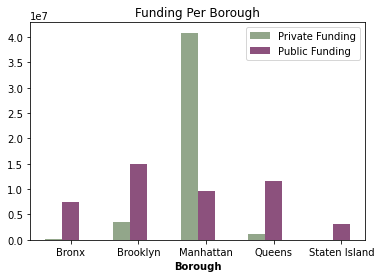

In [14]:
#Plotting private and public funding per borough

barWidth=0.25

bars1 = private_sum['private_funding']
bars2 = public_sum['maintenance_funding']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='#92A68A', width=barWidth, label="Private Funding")
plt.bar(r2, bars2, color="#8C517D", width=barWidth, label="Public Funding")

plt.xlabel("Borough", fontweight="bold")
plt.xticks([r + barWidth for r in range(len(bars1))], ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'])
plt.title('Funding Per Borough')
plt.legend()
plt.show()

In [15]:
#Public funding as percentage of total public funding of NYC Parks
percentage_maintenance= df.groupby(['boro']).sum()['maintenance_funding']/df.sum()['maintenance_funding']*100

In [16]:
percentage_maintenance

boro
Bronx            15.979806
Brooklyn         31.998668
Manhattan        20.480088
Queens           24.707842
Staten Island     6.833595
Name: maintenance_funding, dtype: float64

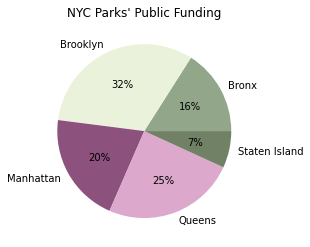

<Figure size 432x288 with 0 Axes>

In [17]:
#Plotting distribution of public funding by borough
public_pie=percentage_maintenance
labels=["Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"]
colors=["#92A68A",'#EBF2DC', "#8C517D","#DCA8CB","#718165"]
plt.pie(public_pie, labels= labels, colors= colors,autopct='%.0f%%')
plt.title("NYC Parks' Public Funding")

fig3 = plt.gcf()
plt.show()
plt.draw()
fig3.savefig('public_perc.svg', dpi=100) 

In [18]:
#Private funding as percentage of total public funding of NYC Parks
percentage_private= df.groupby(['boro']).sum()['private_funding']/df.sum()['private_funding']*100

In [19]:
percentage_private

boro
Bronx             0.328512
Brooklyn          7.647838
Manhattan        89.461514
Queens            2.562136
Staten Island     0.000000
Name: private_funding, dtype: float64

In [20]:
#Drop 0 (Staten Island) for plot 
percentage_private = percentage_private.drop(["Staten Island"])

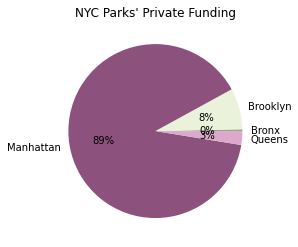

In [21]:
#Plotting distribution of private funding by borough
private_pie=percentage_private
labels2=["Bronx", "Brooklyn", "Manhattan", "Queens"]
colors2=["#92A68A",'#EBF2DC', "#8C517D","#DCA8CB"]
plt.pie(private_pie, labels= labels2, colors= colors2, autopct='%.0f%%')
plt.title("NYC Parks' Private Funding")
plt.show()